In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [10]:
#Import dataset
df = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

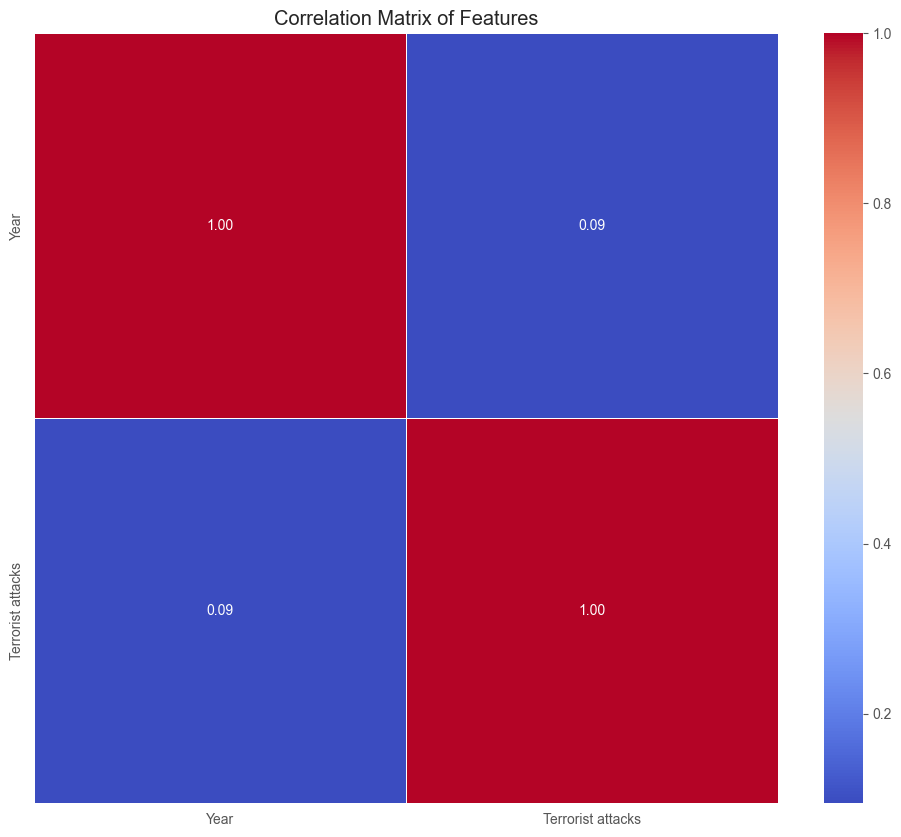

In [15]:
# Assuming df is your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numeric columns

correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [13]:
# Preprocess data
# Here we are dropping unrelated features, and features that are related to each other, as Naive Bayes assumes feature independence.
X = df.drop(columns=['Entity', 'Code'])
y = df['Terrorist attacks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

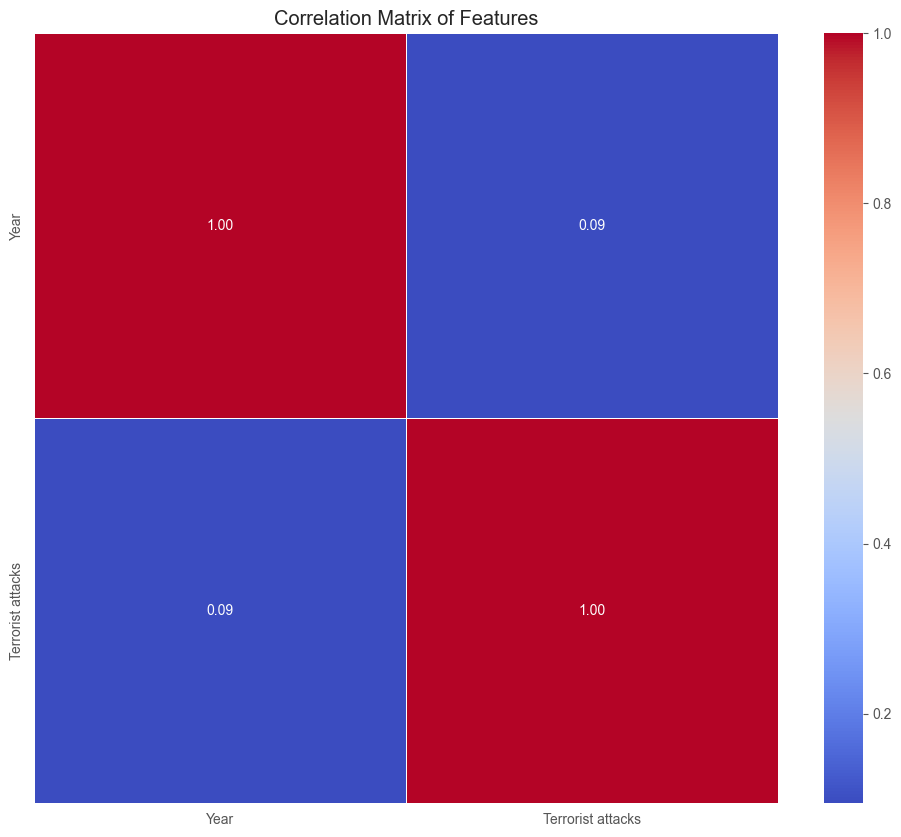

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your terrorist attack data from CSV
terrorist_df = pd.read_csv('C:/Users/23376066/PycharmProjects/Epic3/datasets/clean/terrorist-attacks new.csv')

# Drop non-numeric columns if any
numeric_terrorist_df = terrorist_df.select_dtypes(include=['float64', 'int64'])

# Reset index if needed
numeric_terrorist_df.reset_index(drop=True, inplace=True)

# Compute correlation matrix
correlation_matrix = numeric_terrorist_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [23]:
#Remove outliers using Z-Scores
mean = X.mean()
std = X.std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

cleaned_X = X[(X >= lower_bound) & (X <= upper_bound)]

In [24]:
#Encode and Split dataset
X_encoded = pd.get_dummies(X, drop_first=True)
X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y, test_size=0.1, random_state=42)

In [25]:
#Initialize and fit Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_encoded, y_train_encoded)

GaussianNB()

In [26]:
#Prediction
y_pred_encoded = naive_bayes.predict(X_test_encoded)

In [27]:
#Display Results
accuracy_encoded = accuracy_score(y_test_encoded, y_pred_encoded)
print("Accuracy (with one-hot encoding):", accuracy_encoded)
print(classification_report(y_test_encoded, y_pred_encoded))

Accuracy (with one-hot encoding): 0.9429657794676806
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00     